# Evaluation Exercises

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm

import wrangle as w

In [2]:
df = w.wrangle_zillow()

In [3]:
df.head()

,bedcount,bathcount,sqfeet,value,yearbuilt,taxamount,fips
4,4.0,2.0,3633,296425.0,2005,6941.39,6037
6,3.0,4.0,1620,847770.0,2011,10244.94,6037
7,3.0,2.0,2077,646760.0,1926,7924.68,6037
11,0.0,0.0,1200,5328.0,1972,91.60,6037
14,0.0,0.0,171,6920.0,1973,255.17,6037


In [4]:
X_train, y_train, X_validate, y_validate, X_test, y_test = w.zillow_model_split(df)

In [5]:
X_train_sqft = X_train.sqfeet.values.reshape(-1,1)

## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [6]:
# fit the model

lr = LinearRegression().fit(X_train_sqft, y_train)

In [7]:
y_train = pd.DataFrame(y_train)

In [9]:
y_train['yhat_baseline'] = y_train.value.mean()

In [11]:
y_train['yhat'] = lr.predict(X_train_sqft)

In [13]:
y_train['baseline_residuals'] = y_train.yhat_baseline - y_train.value

In [15]:
y_train['residuals'] = y_train.yhat - y_train.value

In [16]:
y_train.head()

,value,yhat_baseline,yhat,baseline_residuals,residuals
600291,363438.0,460702.563581,230840.358711,97264.563581,-132597.641289
1465690,629340.0,460702.563581,467796.735660,-168637.436419,-161543.264340
2009603,388825.0,460702.563581,548649.271269,71877.563581,159824.271269
2088361,224380.0,460702.563581,350170.908254,236322.563581,125790.908254
1181326,632000.0,460702.563581,264934.801437,-171297.436419,-367065.198563


In [ ]:
train_

## 3. Plot the residuals for the linear regression model that you made.

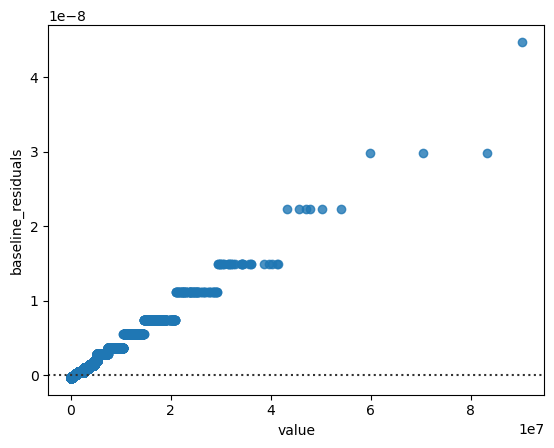

In [25]:

sns.residplot(x='value', y='baseline_residuals', data=y_train)

plt.show()

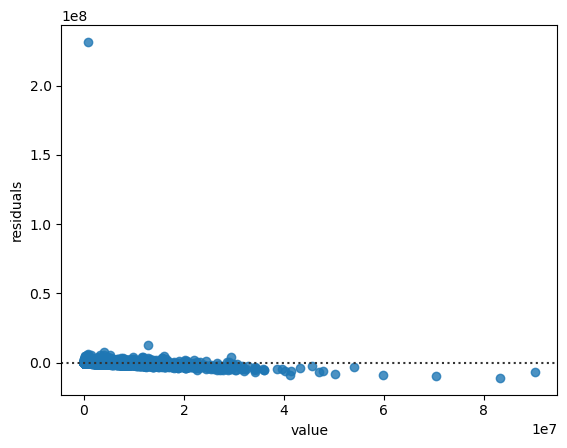

In [27]:
sns.residplot(x='value', y='residuals', data=y_train)

plt.show()

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [40]:
SSE2 = mean_squared_error(y_train.value, y_train.yhat)*len(y_train)
SSE2_baseline = mean_squared_error(y_train.value, y_train.yhat_baseline)*len(y_train)

MSE2 = mean_squared_error(y_train.value, y_train.yhat)
MSE2_baseline = mean_squared_error(y_train.value, y_train.yhat_baseline)

RMSE2 = mean_squared_error(y_train.value, y_train.yhat) ** .5
RMSE2_baseline = mean_squared_error(y_train.value, y_train.yhat_baseline) ** .5

print(f'''
      SSE2:           {SSE2} 
      SSE2_baseline:  {SSE2_baseline}
      MSE2:           {MSE2}
      MSE2_baseline:  {MSE2_baseline}
      RMSE2:          {RMSE2}
      RMSE2_baseline: {RMSE2_baseline}''')



      SSE2:           4.627086964472079e+17 
      SSE2_baseline:  5.877274029414811e+17
      MSE2:           360325459935.6362
      MSE2_baseline:  457681362826.5752
      RMSE2:          600271.1553420139
      RMSE2_baseline: 676521.5168984466


## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [41]:
if SSE2 < SSE2_baseline:
    print('OLS Regression Model Performs Better than Baseline')
else:
    print('OLS Regression Model Does Not Perform Better than Baseline')

OLS Regression Model Performs Better than Baseline


## 7. What is the amount of variance explained in your model?

In [43]:
r2_score(y_train.value, y_train.yhat)

0.2127154627614345

## 8. Is your model better than the baseline model?

Yes the rmse of model is lower than the baseline.